In [1]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_name = 'F01/Session1/wav_arrayMic/0001.wav'
y, sr = librosa.load(file_name)
ps = librosa.feature.melspectrogram(y=y, sr=sr)

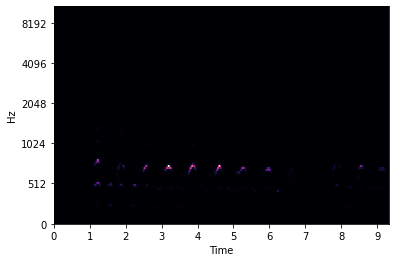

In [3]:
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

In [4]:
ps.shape[0]

128

In [6]:
import numpy as np

arr = np.random.randint(0, 10, (7, 4))

def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """

    h = array.shape[0]
    w = array.shape[1]

    a = (xx - h) // 2
    aa = xx - a - h

    b = (yy - w) // 2
    bb = yy - b - w

    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

In [8]:
# generate random integer values
from numpy.random import seed
from numpy.random import randint
# seed random number generator
seed(1)
# generate some integers
arr = randint(1, 10,(10,20))
print(arr)

[[6 9 6 1 1 2 8 7 3 5 6 3 5 3 5 8 8 2 8 1]
 [7 8 7 2 1 2 9 9 4 9 8 4 7 6 2 4 5 9 2 5]
 [1 4 3 1 5 3 8 8 9 7 4 8 8 5 6 4 7 9 1 3]
 [8 8 8 4 1 9 8 8 2 2 4 1 9 7 5 6 7 3 6 8]
 [9 5 5 8 8 5 1 3 1 8 2 8 9 5 1 2 9 3 4 2]
 [3 8 3 7 1 3 7 7 3 8 8 1 7 6 2 5 7 1 7 6]
 [2 3 2 6 5 1 8 9 6 8 1 4 2 5 5 7 9 9 3 8]
 [6 6 5 6 9 6 9 2 2 9 8 1 4 5 3 1 4 6 2 3]
 [5 4 1 7 1 8 3 9 4 1 9 5 3 1 4 9 2 5 4 4]
 [7 8 4 6 4 3 5 5 1 4 4 9 4 6 7 8 6 2 8 1]]


In [9]:
padding(arr,10,20)

array([[6, 9, 6, 1, 1, 2, 8, 7, 3, 5, 6, 3, 5, 3, 5, 8, 8, 2, 8, 1],
       [7, 8, 7, 2, 1, 2, 9, 9, 4, 9, 8, 4, 7, 6, 2, 4, 5, 9, 2, 5],
       [1, 4, 3, 1, 5, 3, 8, 8, 9, 7, 4, 8, 8, 5, 6, 4, 7, 9, 1, 3],
       [8, 8, 8, 4, 1, 9, 8, 8, 2, 2, 4, 1, 9, 7, 5, 6, 7, 3, 6, 8],
       [9, 5, 5, 8, 8, 5, 1, 3, 1, 8, 2, 8, 9, 5, 1, 2, 9, 3, 4, 2],
       [3, 8, 3, 7, 1, 3, 7, 7, 3, 8, 8, 1, 7, 6, 2, 5, 7, 1, 7, 6],
       [2, 3, 2, 6, 5, 1, 8, 9, 6, 8, 1, 4, 2, 5, 5, 7, 9, 9, 3, 8],
       [6, 6, 5, 6, 9, 6, 9, 2, 2, 9, 8, 1, 4, 5, 3, 1, 4, 6, 2, 3],
       [5, 4, 1, 7, 1, 8, 3, 9, 4, 1, 9, 5, 3, 1, 4, 9, 2, 5, 4, 4],
       [7, 8, 4, 6, 4, 3, 5, 5, 1, 4, 4, 9, 4, 6, 7, 8, 6, 2, 8, 1]])

In [10]:
import os
import numpy as np
from tqdm import tqdm

D = [] # Dataset
data = {
        "spect": [],
        "label": []
       }

directories =[  
                 ['F01','Atypical'],['F03','Atypical'],['F04','Atypical'],['FC01','Typical'],['FC02','Typical'],
                 ['FC03','Typical'],['M01','Atypical'],['M02','Atypical'],['M03','Atypical'],['M04','Atypical'],
                 ['M05','Atypical'],['MC01','Typical'],['MC02','Typical'],['MC03','Typical'],['MC04','Typical']
             ]

for pair in directories:
    directory = pair[0]
    label = pair[1]
    print(directory)
    for filename in os.listdir(directory):
        if filename != 'Notes':
            file = os.path.join(directory, filename)
            file = os.path.join(file, 'wav_arrayMic')
            if os.path.isdir(file):
                for audiofile in tqdm(os.listdir(file)):
                    f = os.path.join(file, audiofile)
                    if os.path.isfile(f):
                        if librosa.get_duration(filename=f) != 0:
                            y, sr = librosa.load(f)
                            
                            ps = librosa.feature.melspectrogram(y=y, sr=sr)
                            #ps = librosa.feature.melspectrogram(y=y, sr=sr)
                            if ps.shape[1] > 400 : continue
                            PS = ps
                            data["spect"].append(PS.tolist())
                            data["label"].append(label)
                            D.append( (np.array(padding(ps,128,400)), label) )

  0%|          | 0/134 [00:00<?, ?it/s]

F01


  0%|          | 0/204 [00:00<?, ?it/s]

F03


  0%|          | 0/199 [00:00<?, ?it/s]

F04


  0%|          | 0/256 [00:00<?, ?it/s]

FC01


  0%|          | 0/269 [00:00<?, ?it/s]

FC02


  0%|          | 0/400 [00:00<?, ?it/s]

FC03


  0%|          | 0/100 [00:00<?, ?it/s]

M01


  0%|          | 0/240 [00:00<?, ?it/s]

M02


  0%|          | 0/416 [00:00<?, ?it/s]

M03


  1%|          | 1/126 [00:00<00:18,  6.82it/s]

M04


  0%|          | 0/128 [00:00<?, ?it/s]

M05


  0%|          | 1/329 [00:00<00:51,  6.39it/s]

MC01


  0%|          | 0/388 [00:00<?, ?it/s]

MC02


  0%|          | 0/600 [00:00<?, ?it/s]

MC03


  0%|          | 0/648 [00:00<?, ?it/s]

MC04


100%|██████████| 373/373 [00:58<00:00,  6.36it/s]


In [11]:
print("Number of samples: ", len(D))

Number of samples:  9238


In [12]:
dataset = D
random.shuffle(dataset)

train = dataset[:8000]
dataset = dataset[8000:]
validate = dataset[:1000]
test = dataset[1000:]

X_train, y_train = zip(*train)
X_validate, y_validate = zip(*validate)
X_test, y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 400, 1) ) for x in X_train])
X_validate = np.array([x.reshape( (128, 400, 1) ) for x in X_validate])
X_test = np.array([x.reshape( (128, 400, 1) ) for x in X_test])

In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#y=to_categorical(labelencoder.fit_transform(y))
#y
y_train = np.array(to_categorical(labelencoder.fit_transform(y_train)))
y_validate = np.array(to_categorical(labelencoder.fit_transform(y_validate)))
y_test = np.array(to_categorical(labelencoder.fit_transform(y_test)))

In [14]:
X_train.shape, X_validate.shape, X_test.shape, y_train.shape, y_validate.shape, y_test.shape

((8000, 128, 400, 1),
 (1000, 128, 400, 1),
 (238, 128, 400, 1),
 (8000, 2),
 (1000, 2),
 (238, 2))

In [15]:
model = Sequential()
input_shape=(128, 400, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 396, 24)      624       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 198, 24)       0         
_________________________________________________________________
activation (Activation)      (None, 31, 198, 24)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 194, 48)       28848     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 97, 48)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 6, 97, 48)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 93, 48)         5

In [16]:
model.compile(
	optimizer="Adam",
	loss="categorical_crossentropy",
	metrics=['accuracy'])

model.fit(
	x=X_train, 
	y=y_train,
    epochs=12,
    batch_size=32,
    validation_data= (X_validate, y_validate))

score = model.evaluate(
	x=X_test,
	y=y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
250/250 [==============================] - 511s 2s/step - loss: 1.1318 - accuracy: 0.7526 - val_loss: 0.3967 - val_accuracy: 0.8440
Epoch 2/12
250/250 [==============================] - 436s 2s/step - loss: 0.4233 - accuracy: 0.8263 - val_loss: 0.3792 - val_accuracy: 0.8470
Epoch 3/12
250/250 [==============================] - 434s 2s/step - loss: 0.3863 - accuracy: 0.8485 - val_loss: 0.3653 - val_accuracy: 0.8410
Epoch 4/12
250/250 [==============================] - 431s 2s/step - loss: 0.4062 - accuracy: 0.8425 - val_loss: 0.3783 - val_accuracy: 0.8330
Epoch 5/12
250/250 [==============================] - 439s 2s/step - loss: 0.3640 - accuracy: 0.8530 - val_loss: 0.3350 - val_accuracy: 0.8680
Epoch 6/12
250/250 [==============================] - 428s 2s/step - loss: 0.3505 - accuracy: 0.8610 - val_loss: 0.3276 - val_accuracy: 0.8820
Epoch 7/12
250/250 [==============================] - 416s 2s/step - loss: 0.3401 - accuracy: 0.8663 - val_loss: 0.3413 - val_accuracy: 0.8620

In [17]:
import json
with open('original.json', "w") as fp:json.dump(data, fp, indent=1)

In [18]:
# save the model to disk
#filename = 'finalized_model.sav'
model.save('original_model')

INFO:tensorflow:Assets written to: original_model\assets


In [19]:
predict = model.predict_classes(X_test)
prediction_class = labelencoder.inverse_transform(predict)
#real_class = labelencoder.inverse_transform(y_test)
#prediction_class

x, y = zip(*test)
y
match = 0
print('  Real       Prediction       Match')
for i in range(0,X_test.shape[0]):
    if(y[i]==prediction_class[i]):
        match+=1
    print(y[i] + '       ' + prediction_class[i] + '       ' + str(y[i]==prediction_class[i]))
print('Matched = ', match)
print('Not Matched = ',(X_test.shape[0] - match))

  Real       Prediction       Match
Typical       Typical       True
Typical       Typical       True
Typical       Typical       True
Atypical       Atypical       True
Typical       Typical       True
Atypical       Atypical       True
Typical       Typical       True
Atypical       Atypical       True
Typical       Typical       True
Atypical       Typical       False
Typical       Typical       True
Typical       Typical       True
Typical       Typical       True
Typical       Typical       True
Typical       Typical       True
Typical       Typical       True
Atypical       Atypical       True
Atypical       Typical       False
Atypical       Atypical       True
Atypical       Atypical       True
Typical       Typical       True
Atypical       Atypical       True
Atypical       Typical       False
Atypical       Typical       False
Atypical       Atypical       True
Typical       Typical       True
Atypical       Atypical       True
Typical       Typical       True
Atypical      